*1. `Бизнес-проблема:`* мы считаем, что конверсии из визита в покупку в нашем магазине недостаточно высоки. Мы посмотрели на страницы конкурентов и поняли, что у нас есть возможность увеличить объем продаж, если мы еще немного изменим дизайн страницы с каталогом продукции. 

*2. `Гипотеза:`* предполагается, что добавление видео с процессом приготовления вкусностей мотивирует к их покупке и позволяет добиться двух эффектов:
   * повышение конверсии из визита в оплату (больше людей захотят купить нашу продукцию)
   * как минимум, не снижение среднего чека покупки, а в идеале — увеличение
    
*3. `Ожидаемые действия пользователей:`* мы ожидаем, что, увидев видео с процессом приготовления вкусностей вместе с описанием продукции, больше людей захотят сделать покупку, а возможно — в среднем будут покупать больше продукции в одном заказе.

*4. `Эксперимент будет считаться успешным, если:`*
   * конверсия из визита в покупку с окном в 7 дней повысится
   * средний чек покупки не снизится

Проанализировать данные нового теста и дать свои комментарии о его успешности. Можно ли выкатывать изменение на всех пользователей?

1. Выбрать окно конверсии
2. Исследовать распределение пользователей по группам по основным сегментам
3. Оценить статистическую значимость в изменении конверсии с помощью критерия хи-квадрат
4. Вычислить мощность теста
5. Использовать бутстрап для оценки влияния теста на средний чек
6. Сделать вывод по результатам проведенного теста 

In [1]:
import pandas as pd

In [2]:
historical_data = pd.read_csv('investigate_window.csv',parse_dates = [2,3], index_col = 0)
# сделать колонку индексом, с помощью index_col

In [3]:
historical_data.head()

,user_id,main_page_viewed_at,order_completed_at,time_to_order
0,959238,2020-11-20 23:55:02.759000+00:00,2020-11-30 02:22:32.759000+00:00,9.102431
1,337366,2020-12-05 23:41:42.244000+00:00,2020-12-12 22:25:52.244000+00:00,6.947338
2,259956,2020-11-20 23:33:53.269000+00:00,2020-11-25 13:08:03.269000+00:00,4.565394
3,534280,2020-11-28 23:44:56.556000+00:00,2020-12-05 10:14:06.556000+00:00,6.436921
4,795121,2020-11-18 23:59:56.236000+00:00,2020-11-27 02:38:16.236000+00:00,8.109954


In [4]:
historical_data.isnull().sum()

user_id                0
main_page_viewed_at    3
order_completed_at     3
time_to_order          0
dtype: int64

In [5]:
# Проверь, выводятся ли даты в формате datetime. Если нет — исправь это. 

historical_data.dtypes

user_id                              int64
main_page_viewed_at    datetime64[ns, UTC]
order_completed_at     datetime64[ns, UTC]
time_to_order                      float64
dtype: object

In [6]:
import numpy as np

In [7]:
perc_95 = round(np.percentile(historical_data['time_to_order'], 95), 1) # 95 процентиль
perc_95

7.1

In [8]:
round(np.percentile(historical_data['time_to_order'], 90), 1) 

2.9

In [9]:
round(np.percentile(historical_data['time_to_order'], 85), 1)

2.0

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt

D:\Steam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


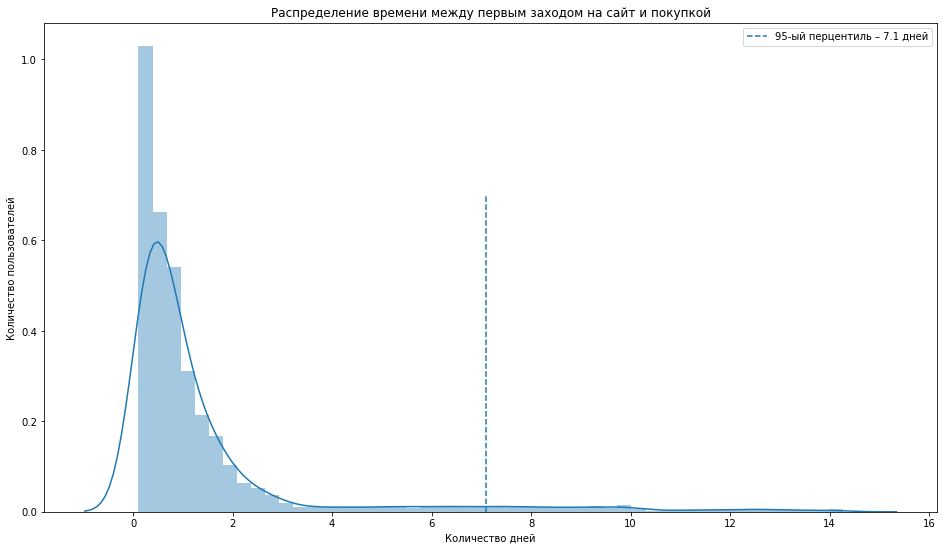

In [11]:
plt.figure(figsize=(16,9))
sns.distplot(historical_data['time_to_order'])
plt.vlines(perc_95, ymin = 0, ymax = 0.7, linestyles = 'dashed', label = f'95-ый перцентиль – {perc_95} дней')
plt.title('Распределение времени между первым заходом на сайт и покупкой')
plt.xlabel('Количество дней')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show()

In [12]:
# напиши здесь код
data = pd.read_csv('bakery_ab_test.csv', index_col = 0)
data

,user_id,test_group,purchase_amount,geo_group,acquisition_channel,within_window,platform
1,3738,test,306.639511,regions,target_direct,1,pc
2,3755,control,NaN,regions,target_direct,0,pc
3,3772,test,NaN,regions,context_brand,0,mobile
4,3789,control,NaN,spb,target_direct,0,pc
5,3806,test,NaN,regions,social_media,0,pc
...,...,...,...,...,...,...,...
152995,2604636,test,NaN,regions,target_direct,0,pc
152996,2604653,control,5236.818309,regions,organic,1,mobile
152997,2604670,control,NaN,regions,target_direct,0,pc
152998,2604687,control,101.783032,regions,target_direct,1,pc


In [13]:
data.isnull().sum() 
# значение нулов очень велико

user_id                     0
test_group                  0
purchase_amount        103058
geo_group                   0
acquisition_channel         0
within_window               0
platform                    0
dtype: int64

In [14]:
data['purchase_amount'].count() 

47425

In [15]:
# либо удалять, либо заменять на 0. И то и то сильно скажется на всех расчет. 
# Я бы стросил,но это домашка, поэтому просто заменю на 0
data_not_null = data.fillna({'purchase_amount': 0})

In [16]:
data_not_null.isnull().sum() 

user_id                0
test_group             0
purchase_amount        0
geo_group              0
acquisition_channel    0
within_window          0
platform               0
dtype: int64

In [17]:
# напиши здесь код
def plot_segment_distribution (df, sigment, test_factor):
    for i in sigment:
        j = df.groupby([i,test_factor])['user_id'].count().reset_index()
        sns.barplot( x=i, y='user_id', hue = test_factor, data = j)
        plt.show()

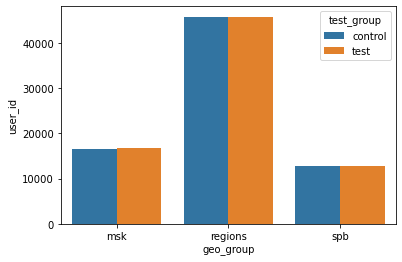

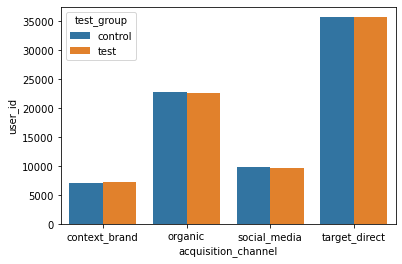

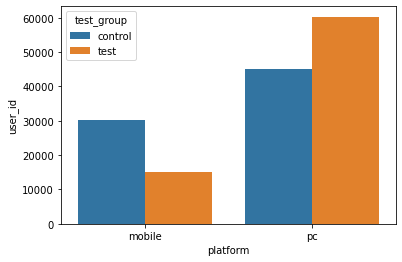

In [18]:
# напиши здесь код
plot_segment_distribution(data, ['geo_group', 'acquisition_channel', 'platform'], 'test_group')

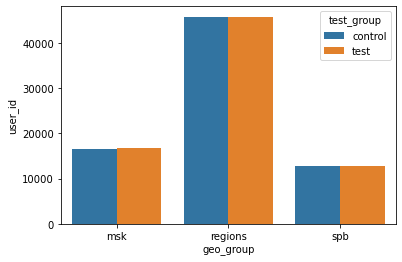

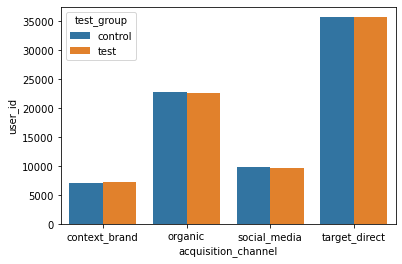

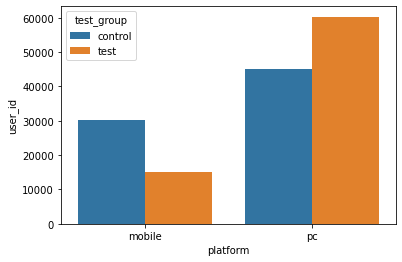

In [19]:
# для варианта без нулов
plot_segment_distribution(data_not_null, ['geo_group', 'acquisition_channel', 'platform'], 'test_group')

In [20]:
metrics = data.groupby('test_group').agg({'user_id' : 'count', 'within_window' : 'sum', 'purchase_amount': 'mean'}).reset_index()
metrics['conv'] = metrics.within_window/metrics.user_id *100
metrics

,test_group,user_id,within_window,purchase_amount,conv
0,control,75210,22998,5170.864335,30.578381
1,test,75273,24427,5394.771589,32.451211


In [21]:
# без нулов средний чек совсем другой
metrics_not_null = data_not_null.groupby('test_group').agg({'user_id' : 'count', 'within_window' : 'sum', 'purchase_amount': 'mean'}).reset_index()
metrics_not_null['conv'] = metrics_not_null.within_window/metrics_not_null.user_id *100
metrics

,test_group,user_id,within_window,purchase_amount,conv
0,control,75210,22998,5170.864335,30.578381
1,test,75273,24427,5394.771589,32.451211


In [22]:
metrics_pc = data.loc[data.platform == 'pc'].groupby('test_group').agg({'user_id' : 'count', 'within_window' : 'sum', 'purchase_amount': 'mean'}).reset_index()
metrics_pc['conv'] = metrics_pc.within_window/metrics_pc.user_id *100
metrics_pc

,test_group,user_id,within_window,purchase_amount,conv
0,control,45112,13732,5200.121803,30.439794
1,test,60317,19659,5401.003720,32.592801


In [23]:
metrics_pc_not_null = data_not_null.loc[data.platform == 'pc'].groupby('test_group').agg({'user_id' : 'count', 'within_window' : 'sum', 'purchase_amount': 'mean'}).reset_index()
metrics_pc_not_null['conv'] = metrics_pc_not_null.within_window/metrics_pc_not_null.user_id *100
metrics_pc_not_null

,test_group,user_id,within_window,purchase_amount,conv
0,control,45112,13732,1582.906380,30.439794
1,test,60317,19659,1760.338414,32.592801


In [24]:
metrics_mobile = data.loc[data.platform == 'mobile'].groupby('test_group').agg({'user_id' : 'count', 'within_window' : 'sum', 'purchase_amount': 'mean'}).reset_index()
metrics_mobile['conv'] = metrics_mobile.within_window/metrics_mobile.user_id *100
metrics_mobile

,test_group,user_id,within_window,purchase_amount,conv
0,control,30098,9266,5127.505438,30.786099
1,test,14956,4768,5369.075812,31.880182


In [25]:
metrics_mobile_not_null = data_not_null.loc[data.platform == 'mobile'].groupby('test_group').agg({'user_id' : 'count', 'within_window' : 'sum', 'purchase_amount': 'mean'}).reset_index()
metrics_mobile_not_null['conv'] = metrics_mobile_not_null.within_window/metrics_mobile_not_null.user_id *100
metrics_mobile_not_null

,test_group,user_id,within_window,purchase_amount,conv
0,control,30098,9266,1578.558887,30.786099
1,test,14956,4768,1711.671133,31.880182


In [26]:
import statsmodels.stats.proportion as proportion

In [27]:
chi2stat, pval, table = proportion.proportions_chisquare(metrics['within_window'], metrics['user_id'])
chi2stat, pval, table

(61.137841436908104,
 5.321539863368111e-15,
 (array([[22998., 52212.],
         [24427., 50846.]]),
  array([[23702.57271585, 51507.42728415],
         [23722.42728415, 51550.57271585]])))

In [28]:
chi2stat_pc, pval_pc, table_pc = proportion.proportions_chisquare(metrics_pc['within_window'], metrics_pc['user_id'])
chi2stat_pc, pval_pc, table_pc

(55.28301795095328,
 1.0436637877855105e-13,
 (array([[13732., 31380.],
         [19659., 40658.]]),
  array([[14287.67029944, 30824.32970056],
         [19103.32970056, 41213.67029944]])))

In [29]:
chi2stat_mobile, pval_mobile, table_mobile = proportion.proportions_chisquare(metrics_mobile['within_window'], metrics_mobile['user_id'])
chi2stat_mobile, pval_mobile, table_mobile

(5.576527147023639,
 0.018202784051985058,
 (array([[ 9266., 20832.],
         [ 4768., 10188.]]),
  array([[ 9375.31255826, 20722.68744174],
         [ 4658.68744174, 10297.31255826]])))

In [30]:
# А теперь для без нулов

In [31]:
chi2stat_nn, pval_nn, table_nn = proportion.proportions_chisquare(metrics_not_null['within_window'], metrics_not_null['user_id'])
chi2stat_nn, pval_nn, table_nn


(61.137841436908104,
 5.321539863368111e-15,
 (array([[22998., 52212.],
         [24427., 50846.]]),
  array([[23702.57271585, 51507.42728415],
         [23722.42728415, 51550.57271585]])))

In [32]:
chi2stat_pc_nn, pval_pc_nn, table_pc_nn = proportion.proportions_chisquare(metrics_pc_not_null['within_window'], metrics_pc_not_null['user_id'])
chi2stat_pc_nn, pval_pc_nn, table_pc_nn

(55.28301795095328,
 1.0436637877855105e-13,
 (array([[13732., 31380.],
         [19659., 40658.]]),
  array([[14287.67029944, 30824.32970056],
         [19103.32970056, 41213.67029944]])))

In [33]:
chi2stat_mobile_nn, pval_mobile_nn, table_mobile_nn = proportion.proportions_chisquare(metrics_mobile_not_null['within_window'], metrics_mobile_not_null['user_id'])
chi2stat_mobile_nn, pval_mobile_nn, table_mobile_nn

(5.576527147023639,
 0.018202784051985058,
 (array([[ 9266., 20832.],
         [ 4768., 10188.]]),
  array([[ 9375.31255826, 20722.68744174],
         [ 4658.68744174, 10297.31255826]])))

**2. Введи в анализ уровень значимости в 5% с помощью переменной** `alpha`.


In [34]:
# напиши здесь код
alpha = 0.05

In [35]:
print(pval < alpha)
print(pval_pc < alpha)
print(pval_mobile < alpha)
print(pval_nn < alpha)
print(pval_pc_nn < alpha)
print(pval_mobile_nn < alpha)

True
True
True
True
True
True


In [36]:
# нулевую гипотезу отвергаем, есть статестически значимые изменения

In [37]:
import statsmodels.stats.power as smp

In [38]:
# напиши здесь код
chipower = smp.GofChisquarePower()

In [39]:
def chi2_effect_size(p0, p1):
    return np.sqrt(((p0 - p1)**2 / p0))

In [40]:
conversion_control = metrics['conv'].values[0]/100
conversion_test = metrics['conv'].values[1]/100
nobs = metrics['user_id'].min()

In [41]:
conversion_control

0.3057838053450339

In [42]:
conversion_test

0.3245121092556428

In [43]:
nobs

75210

In [44]:
conversion_control_mobile = metrics_mobile['conv'].values[0]/100
conversion_test_mobile = metrics_mobile['conv'].values[1]/100
nobs_mobile = metrics_mobile['user_id'].min()

In [45]:
conversion_control_mobile

0.30786098744102597

In [46]:
conversion_test_mobile

0.3188018186680931

In [47]:
nobs_mobile

14956

In [48]:
conversion_control_pc = metrics_pc['conv'].values[0]/100
conversion_test_pc = metrics_pc['conv'].values[1]/100
nobs_pc = metrics_pc['user_id'].min()

In [49]:
conversion_control_pc

0.3043979428976769

In [50]:
conversion_test_pc

0.32592801366115687

In [51]:
nobs_pc

45112

In [52]:
power = chipower.solve_power(effect_size =chi2_effect_size(conversion_control, conversion_test),
                             nobs=nobs,
                             alpha = pval,
                             power=None)
power

0.9290939440556412

In [53]:
mobile_power = chipower.solve_power(effect_size =chi2_effect_size(conversion_control_mobile, conversion_test_mobile),
                             nobs=nobs,
                             alpha = pval_mobile,
                             power=None)
power

0.9290939440556412

In [54]:
pc_power = chipower.solve_power(effect_size =chi2_effect_size(conversion_control_pc, conversion_test_pc),
                             nobs=nobs,
                             alpha = pval_pc,
                             power=None)
power

0.9290939440556412

In [55]:
# мозность больше 80%, по таким данным можно делать выводы

In [56]:
# импортируем необходимые модули
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare
import numpy as np

In [57]:
test = data.loc[data.test_group == 'test']['purchase_amount'].dropna().values
control = data.loc[data.test_group == 'control']['purchase_amount'].dropna().values

test_pc = data[(data['test_group'] == 'test')&(data['platform'] == 'pc')]['purchase_amount'].dropna().values
control_pc = data[(data['test_group'] == 'control')&(data['platform'] == 'pc')]['purchase_amount'].dropna().values

test_mobile = data[(data['test_group'] == 'test')&(data['platform'] == 'mobile')]['purchase_amount'].dropna().values
control_mobile = data[(data['test_group'] == 'control')&(data['platform'] == 'pc')]['purchase_amount'].dropna().values

In [58]:
test
control

array([4912.50769047,  128.7309298 , 5561.0190975 , ..., 5139.97143966,
       5236.81830912,  101.78303218])

In [59]:
test_pc
control_pc

array([4912.50769047, 5561.0190975 ,  240.52248096, ..., 2055.15391568,
       5139.97143966,  101.78303218])

In [60]:
test_mobile
control_mobile

array([4912.50769047, 5561.0190975 ,  240.52248096, ..., 2055.15391568,
       5139.97143966,  101.78303218])

In [61]:
boot = bs.bootstrap_ab(test= test,ctrl=control,
                     stat_func = bs_stats.mean,
                     compare_func = bs_compare.difference,
                     return_distribution = True)
boot

array([211.53285062, 176.70896641, 284.44974406, ..., 200.27057467,
       247.22907894, 209.7549269 ])

In [ ]:
boot_pc = bs.bootstrap_ab(test= test_pc,ctrl=control_pc,
                     stat_func = bs_stats.mean,
                     compare_func = bs_compare.difference,
                     return_distribution = True)
boot_pc

In [ ]:
boot_mobile = bs.bootstrap_ab(test= test_mobile,ctrl=control_mobile,
                     stat_func = bs_stats.mean,
                     compare_func = bs_compare.difference,
                     return_distribution = True)
boot_mobile

In [ ]:
borders = np.percentile(boot, [2.5, 97.5]) 
borders_pc = np.percentile(boot_pc, [2.5, 97.5]) 
borders_mobile = borders_pc = np.percentile(boot_mobile, [2.5, 97.5]) 

In [ ]:
sns.distplot(boot) # функция построения распределения
plt.title('Bootstrap-распределение разниц среднего чека')
plt.rcParams["figure.figsize"] = (12, 6)
plt.vlines(0, # отрисуем линию на уровне ноля
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'red')
plt.vlines(borders, # отрисуем перцентили
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
plt.legend()
plt.show()

In [ ]:
sns.distplot(boot_pc) # функция построения распределения
plt.title('Bootstrap-распределение разниц среднего чека')
plt.rcParams["figure.figsize"] = (12, 6)
plt.vlines(0, # отрисуем линию на уровне ноля
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'red')
plt.vlines(borders_pc, # отрисуем перцентили
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
plt.legend()
plt.show()

In [ ]:
sns.distplot(boot_mobile) # функция построения распределения
plt.title('Bootstrap-распределение разниц среднего чека')
plt.rcParams["figure.figsize"] = (12, 6)
plt.vlines(0, # отрисуем линию на уровне ноля
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'red')
plt.vlines(borders_mobile, # отрисуем перцентили
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
plt.legend()
plt.show()

In [ ]:
# 0 не входит в доверительный инвервал, значит изменения статестически значемы